> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0
#pip install -U numpy==1.13.3
#pip3 install seaborn==0.9.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [5]:
# finiding if there are duplicate values or not
df.duplicated().sum()


0

###### So there are no duplicate values and no null values 

###### The next step will be to convert the date columns into Date-Time format 

In [6]:
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

In [7]:
# Checking the column after the conversion to date time
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [8]:
# so now the no show column is an object
# we need to convert them to 1s and 0s for analysis

In [9]:
df['No-show'] = df['No-show'].replace({'Yes':1,'No':0})
df.tail(11)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110516,6.923772e+13,5780205,F,2016-06-07 07:45:16,2016-06-08,37,MARIA ORTIZ,0,0,0,0,0,0,1
110517,5.574942e+12,5780122,F,2016-06-07 07:38:34,2016-06-07,19,MARIA ORTIZ,0,0,0,0,0,0,0
110518,7.263315e+13,5630375,F,2016-04-27 15:15:06,2016-06-07,50,MARIA ORTIZ,0,0,0,0,0,1,0
110519,6.542388e+13,5630447,F,2016-04-27 15:23:14,2016-06-07,22,MARIA ORTIZ,0,0,0,0,0,1,0
110520,9.969977e+14,5650534,F,2016-05-03 07:51:47,2016-06-07,42,MARIA ORTIZ,0,0,0,0,0,1,0
110521,3.635534e+13,5651072,F,2016-05-03 08:23:40,2016-06-07,53,MARIA ORTIZ,0,0,0,0,0,1,0
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0


In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


### Primary Observation: 
#### From the above describtion alone we can find:
###### 1- The no-show percentage is around 20%.
###### 2- The average age of the collected data is 37 years old.
###### 3- 9%  of the patients received  scholarship.
###### 4- around 20% have Hypertension, 7% have Diabetes, 3% suffer from Alcoholism and 2% are Handicapped.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.

### Research Question 1: Plotting the age of the collected sample and check its distribution

In [11]:
# ploting the distribution of Age
df['Age'] = df.Age.astype(int, inplace = True)
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(2)
memory usage: 11.8+ MB


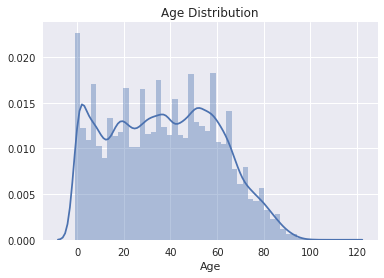

In [13]:
sns.distplot(df['Age']).set_title('Age Distribution');

In [14]:
# there are very little number of patients above 100 years old we can drop them to get more accurate distribution
high_q = df['Age'].quantile(0.99)

In [15]:
df_1 = df[df['Age']<high_q]

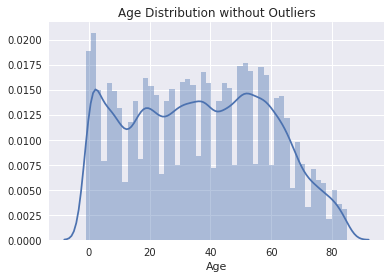

In [16]:
sns.distplot(df_1['Age']).set_title('Age Distribution without Outliers');

#### The age is normally distributed with mean around 40 years old 

In [17]:
# viewing the values after removing 0.01% of the data
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109367 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         109367 non-null float64
AppointmentID     109367 non-null int64
Gender            109367 non-null object
ScheduledDay      109367 non-null datetime64[ns]
AppointmentDay    109367 non-null datetime64[ns]
Age               109367 non-null int64
Neighbourhood     109367 non-null object
Scholarship       109367 non-null int64
Hipertension      109367 non-null int64
Diabetes          109367 non-null int64
Alcoholism        109367 non-null int64
Handcap           109367 non-null int64
SMS_received      109367 non-null int64
No-show           109367 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(2)
memory usage: 12.5+ MB


#### Checking if there is a correlation between the age of the patient and no show frequency


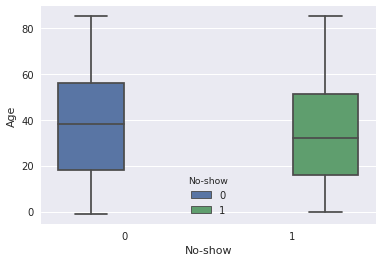

In [18]:
# since the no-show columns are 1s and 0s then we can get the log to check the correlation

sns.boxplot(x="No-show", y="Age",hue="No-show", data=df_1);

> The above figure represents the correlation between age and no show (most of the no show patients are younger)

In [19]:
# counting the number of patiens that didn't show up for their appointments.
df_1[df_1['No-show'] ==1].count()['No-show']

22124

In [20]:
# so 22124 patients out of 109367 patients

percentage = (22124 / 109367)*100
percentage

20.22913675971728

In [22]:
# average age of the patients didn't show up
df_1[df_1['No-show'] ==1].mean()['Age']

33.829687217501359

In [23]:
# average age of the patients who showed up 
df_1[df_1['No-show'] ==0].mean()['Age']

37.222665428744996

#### There are 20% of the patients who didn't show for the appointments with average age of 33 years old 

### Research Question 2: The correlation between Scholarship, age and no-show

#### first, correlation between scholarship and no-show

In [24]:
# counting the number of patients who have the scholarship
Scholarship_yes = df_1[df_1['Scholarship'] == 1].count()['Scholarship']
Scholarship_yes

10861

In [25]:
# counting the number of patient that didn't get the scholarship
Scholarship_no = df_1[df_1['Scholarship'] == 0].count()['Scholarship']
Scholarship_no

98506

In [26]:
# the total percentage of the patients who got the scholarship
# total number of patients 109367
percentage_yes = (Scholarship_yes / 109367)*100
percentage_yes 

9.9307835087366385

In [27]:
# the total percentage of the patients who got the scholarship
percentage_no = (Scholarship_no / 109367)*100
percentage_no 

90.069216491263361

In [28]:
# patients who don't have a scholarship and was no show
Schol_no = df_1[df_1['Scholarship'] == 0].sum()['No-show']
Schol_no

19546

In [29]:
# patients who have the scholarship and was no show
Schol_yes = df_1[df_1['Scholarship'] == 1].sum()['No-show']
Schol_yes

2578

In [30]:
scholarship_percentage = pd.DataFrame({'Scholarship Yes': [percentage_yes], 'Scholarship No': [percentage_no]}, index = ['Percentage'])
scholarship_percentage

,Scholarship Yes,Scholarship No
Percentage,9.930784,90.069216


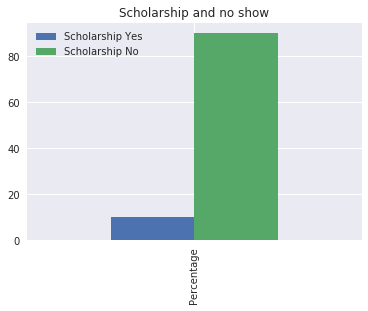

In [31]:
# plotting the graph for the patients who got the scholarship and the ones who didn't
scholarship_percentage[['Scholarship Yes','Scholarship No']].plot(kind = 'bar', title = 'Scholarship and no show');

In [32]:
df_1[df_1['Scholarship'] == 1].mean()['Age']

30.616241598379524

In [33]:
df_1[df_1['Scholarship'] == 0].mean()['Age']

37.189024018841494

#### the mean of the patients who got the scholarship is 30 years old
#### the mean for the patients who didn't get the scholarship is 37 years old

#### So in conclusion the above question
##### Most patients didn't have a scholarship
> However, their age and the fact that they missed their appointments or not doesn't have anything to do with them having a scholarship or not. 
> Almost same percentage of patients who either have a scholarship or haven't ended up no show

### plot for genders and no-show

In [34]:
male = df_1[df_1['Gender'] == 'M'].sum()['No-show']
male

7662

In [35]:
female = df_1[df_1['Gender'] == 'F'].sum()['No-show']

In [36]:
gender = pd.DataFrame({'Male': [male], 'Female': [female]}, index = ['Gender'])
gender

,Male,Female
Gender,7662,14462


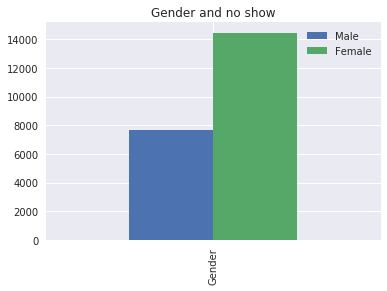

In [37]:
gender[['Male','Female']].plot(kind = 'bar', title = 'Gender and no show');

##### Females tend to miss more appointments. However, lets check the precentage of the males and females to see if we can get more accurate results about the gender

In [38]:
no_male = df_1[df_1['Gender'] == 'M'].count()['Gender']
no_female = df_1[df_1['Gender'] == 'F'].count()['Gender']

In [39]:
gender_count = pd.DataFrame({'Male_no': [no_male], 'Female_no': [no_female]}, index = ['Gender_count'])
gender_count

,Male_no,Female_no
Gender_count,38351,71016


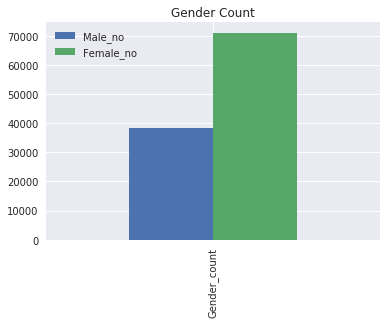

In [40]:
gender_count[['Male_no','Female_no']].plot(kind = 'bar', title = 'Gender Count');

In [41]:
male_percent = (male/no_male)*100
female_percent = (female/no_female)*100

In [42]:
# percentage of males that was no show from the total male count
male_percent

19.978618549711872

In [43]:
# percentage of females that was no show from the total female count
female_percent

20.364424918328265

<a id='conclusions'></a>
## Conclusions

> ###### **Parameters that we checked**: 
> ###### **Age** - We can see that more young people miss their appointments than old patients
> ###### **Scholarship** - The scholarship doesn't have an impact weither the patient show up or not
> ###### **Gender** - almost the same percentage of males and females miss their appointment

## Limitations of the collected data
> 1 -  Age is somehow normally distributed to represent most of the population

> 2 - Scholarship (Yes, No) 99% of the sample didn't get the scholarship which might affect our prediction regarding the no-show

> 3 - Gender, the female count is almost twice the male count which might not present an accurate results regarding the no show prediction. However, it shows that females tend to have more appointments than males

> ###### The size of the data is sufficient to make predictions but, since the collected data is not diverse enough we need to try and collect more data.

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0